# Lets Grow More - Virtual Internship Program(VIP) - Data Science Intern 

# Task3: Develop A Neural Network That Can Read Handwriting

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Loading the data

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Show image

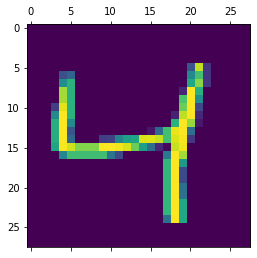

In [5]:
plt.matshow(x_train[2])

### Visualization of data

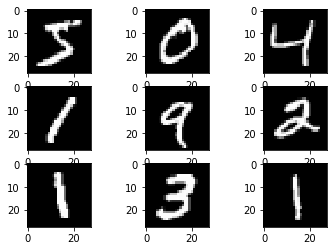

In [6]:
for i in range(9):
    plt.subplot(3,3,i+1)
    #plot the pixel data
    plt.imshow(x_train[i].reshape(28,28),cmap=plt.get_cmap('gray'))

In [7]:
# Data Normalization
x_train=x_train/255
x_test=x_test/255
# reshape the data 
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_train_flatten.shape

(60000, 784)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

#making a sequential model
model=Sequential()

#input hidden layers
model.add(Dense(100,input_dim=784,activation='relu'))
#hidden layer
model.add(Dense(10,activation='relu'))
#output layer
model.add(Dense(10,activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=10)

Using TensorFlow backend.


Epoch 1/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.3744 - accuracy: 0.8967
Epoch 2/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.1522 - accuracy: 0.9561
Epoch 3/10
60000/60000 [==============================] - 8s 133us/step - loss: 0.1101 - accuracy: 0.9679
Epoch 4/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0881 - accuracy: 0.9736
Epoch 5/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0727 - accuracy: 0.9785
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0608 - accuracy: 0.9819
Epoch 7/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.0502 - accuracy: 0.9843
Epoch 8/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.0432 - accuracy: 0.9868
Epoch 9/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0387 - accuracy: 0.9886
Epoch 10/10
60000/60000 [====================

In [9]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy
0,0.374409,0.896717
1,0.152228,0.956067
2,0.110106,0.967867
3,0.088061,0.973567
4,0.072676,0.978450
5,0.060800,0.981900
6,0.050157,0.984300
7,0.043249,0.986800
8,0.038693,0.988583
9,0.033222,0.989733


In [10]:
y_pred=model.predict(x_test_flatten)
y_pred[0]

array([1.08808473e-08, 2.98904408e-11, 5.42795988e-07, 1.47723529e-06,
       7.16388884e-12, 1.52051982e-11, 1.36695120e-17, 1.05896667e-01,
       1.10121938e-08, 1.02697595e-05], dtype=float32)

In [11]:
y_pred_labels=[np.argmax(i) for i in y_pred]

## Evaluate models

In [12]:
# checking the model accuracy
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    1,    0,    3,    0,    1,    2,    1],
       [   0, 1123,    3,    0,    0,    0,    1,    1,    7,    0],
       [   2,    3, 1011,    3,    2,    0,    3,    3,    5,    0],
       [   0,    0,    5,  974,    0,   13,    0,    7,    7,    4],
       [   5,    1,    6,    0,  943,    0,    2,    3,    3,   19],
       [   3,    0,    0,    3,    0,  875,    3,    1,    4,    3],
       [   7,    3,    4,    1,    5,    8,  929,    0,    1,    0],
       [   2,    4,   11,    4,    0,    1,    0,  993,    6,    7],
       [   4,    0,    4,    2,    3,    6,    3,    3,  945,    4],
       [   2,    4,    0,    1,    8,    9,    1,    3,    1,  980]])>

Text(87.0, 0.5, 'Actual')

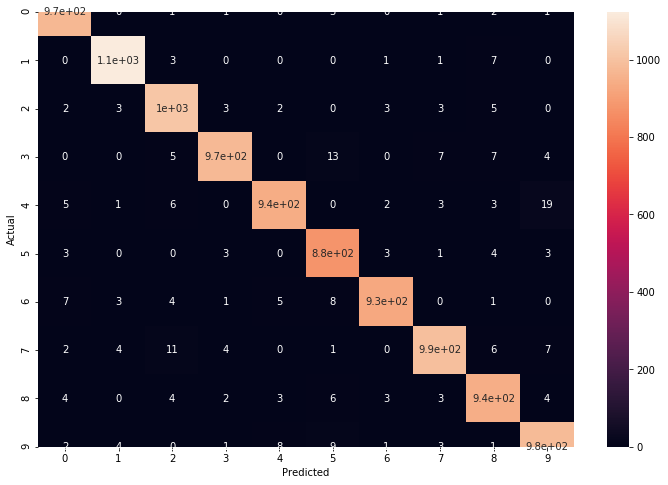

In [13]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

Predicted value: 6



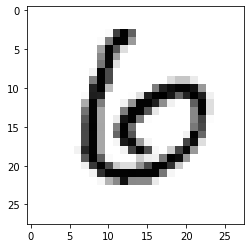

In [14]:
# Visualize some test prediction and corresponding digit 

test_index = 11

plt.imshow(x_test[test_index], cmap='Greys')
print(f"Predicted value: {y_pred_labels[test_index]}\n")